In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
from random import seed

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 


import warnings
warnings.filterwarnings( "ignore" )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task-1: Implement Perceptron model from scratch and compare its performance with Logistic Regression for the task of binary classification on the given three datasets.**

In [12]:
# perceptron algorithm from scratch
class Perceptron:
  def __init__(self, max_iter=100):
    self.max_iteration = max_iter
  
  # class variables
  w = None
  epoch = 0


  # class method for training 
  def train(self,X,y):
    # convert X and y in to array
    X = np.array(X)
    y = np.array(y)
    n, m = np.shape(X)

    # add column with all 1s for considering threshold
    X = np.c_[X, np.ones(n)]

    # initialize parameter vector as zero vector
    self.w = np.zeros(m+1)

    while True:
      count = 0
      for i in range(n):
        # generate random number for randomly walk through dataset
        temp = [j for j in range(n)]
        index = temp.pop(randrange(len(temp)))

        # find y value, y = 1 if w.t X >=0 else its 0
        y_pred = 1 if np.dot(X[index], self.w) >=0 else 0

        # find e, if e = correctly classified, count number of correctly classified. else update weights
        e = y[index] - y_pred
        if e == 0:
          count = count+1
        else:
          self.w = self.w + e* X[index]

      # if number of correctly classified = dataset size or max iteration end the process    
      self.epoch = self.epoch +1
      if count == n or self.epoch==self.max_iteration:
        break
    return self

  # class method for prediction the labels
  def predict(self,X):
    X = np.array(X)
    n, m = np.shape(X)
    X = np.c_[X, np.ones(n)]

    # calculate w.T X 
    temp = np.dot(X, self.w.reshape(m+1,1))

    # if w.T X .=0 y =1, else y=0
    y = np.where(temp >=0, 1, 0)

    return y

In [18]:
#Comparing Perceptron and Logistic Regression
for i in range(1,4):

  #load train and test datasets
  path = '/content/drive/MyDrive/datasets/DL/A3/'
  file_train = 'data'+str(i)+'_train.csv'
  df = pd.read_csv(path+file_train)


  # define X and y                                     
  X = df.iloc[:,:-1]
  y = df.iloc[:,-1]
  X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

  #classification with perceptron
  model1 = Perceptron(max_iter=200)
  model1.train(X_train, y_train)
  y_pred1 = model1.predict(X_test)

  #classification with logistic regression
  model2 = LogisticRegression()
  model2.fit(X_train, y_train)
  y_pred2 = model2.predict(X_test)

  # printing the results
  print(f'Dataset-{i}')
  print('--------------')
  print('Accuracy with Perceptron          :{:.2f}'.format(accuracy_score(y_test,y_pred1)*100))
  print('Accuracy with Logistic Regression :{:.2f}\n'.format(accuracy_score(y_test,y_pred2)*100))

Dataset-1
--------------
Accuracy with Perceptron          :99.66
Accuracy with Logistic Regression :100.00

Dataset-2
--------------
Accuracy with Perceptron          :46.94
Accuracy with Logistic Regression :47.62

Dataset-3
--------------
Accuracy with Perceptron          :73.42
Accuracy with Logistic Regression :88.61



**Task-2:Submit the predicted labels for all three datasets**

In [21]:
for i in range(1,4):

  #load train and test datasets
  path = '/content/drive/MyDrive/datasets/DL/A3/'
  file_train = 'data'+str(i)+'_train.csv'
  file_test = 'data'+str(i)+'_test.csv'
  df_train = pd.read_csv(path+file_train)
  df_test = pd.read_csv(path+file_test)


  # define X and y                                     
  X_train = df_train.iloc[:,:-1]
  y_train = df_train.iloc[:,-1]
  X_test = df_test

  #classification with perceptron
  model = Perceptron(max_iter=200)
  model.train(X_train, y_train)
  y_test = model.predict(X_test)
  
  # save the files as .csv
  df_test['Prediction'] = y_test
  df_test.to_csv(path+'predictions_'+file_test)

  # print first 10 predictions of the each datasets
  print(f'First 10 prediction of test data-{i}')
  print('---------------------------------')
  print(df_test.head(10))
  print('\n')

First 10 prediction of test data-1
---------------------------------
         x1        x2  Prediction
0 -2.794472 -1.039104           0
1  5.186285  4.618729           1
2 -2.123100  1.039727           0
3 -0.269293 -0.110851           0
4  5.342423  6.242017           1
5  4.870656  5.502935           1
6 -0.682451 -1.692052           0
7 -0.761294  0.003645           0
8  5.766999  7.273105           1
9  1.588068  0.112644           0


First 10 prediction of test data-2
---------------------------------
         x1        x2  Prediction
0 -6.249406  6.136730           0
1  5.093672 -3.673956           1
2 -2.607655  0.251455           0
3  5.050567  6.077485           1
4 -3.046816  0.808760           0
5  3.857482 -1.327385           1
6  2.903749 -4.259132           1
7  1.265416  4.597588           1
8  6.076112 -5.285845           1
9 -0.900415 -3.712824           0


First 10 prediction of test data-3
---------------------------------
    0  1  2    3    4  5  6    7  8    9 

**Task-3: Plot the decision boundary plots for both the two models, i.e.,Logistic Regression and Perceptron, and write down your observations comparing and contrasting between the three plots.**

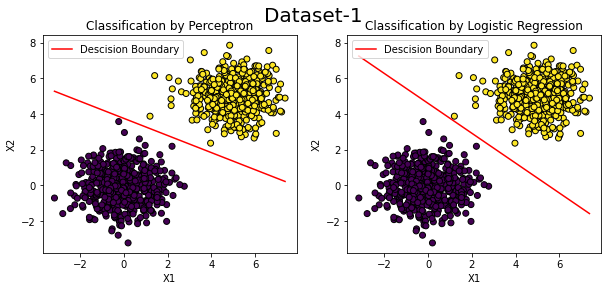

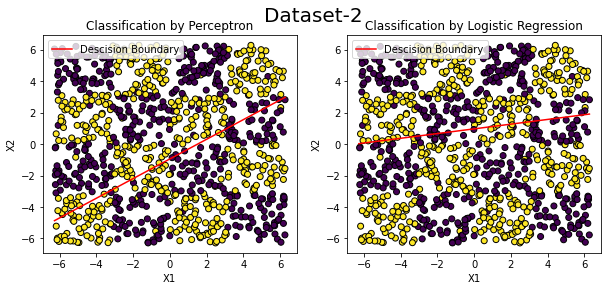

In [32]:
for i in range(1,3):

  # loading the data
  path = '/content/drive/MyDrive/datasets/DL/A3/'
  file_train = 'data'+str(i)+'_train.csv'
  df = pd.read_csv(path+file_train)
  
  # define x and y
  X = df.iloc[:,:-1]
  y = df.iloc[:,-1]
 
  # classification by perceptron
  model1 = Perceptron(max_iter =300)
  model1.train(X,y)
  
  # get parameters and find coefficient of the line x2 = mx1+c
  w = model1.w
  m = -w[0]/w[1]
  c = -w[2]/w[1]
  
  # set min and max of x2
  l = min(X.iloc[:,0])
  h = max(X.iloc[:,0])

  # create points for ploting descision boundary
  x1 = np.linspace(l,h, 100)
  x2 = m*x1 + c
  
  # plot points and descision boundary 
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.scatter(df.iloc[:,0], df.iloc[:,1], c=y, edgecolors='black')
  plt.plot(x1,x2,'-r', label='Descision Boundary')
  plt.title('Classification by Perceptron')
  plt.xlabel('X1', size= 10)
  plt.ylabel('X2', size = 10)
  plt.legend(loc='upper left')


  # classification by logidtic regression
  model2 = LogisticRegression()
  model2.fit(X,y)
  
  # get parameters and find coefficient of the line x2 = mx1+c
  w = model2.coef_[0]
  m = -w[0]/w[1]
  c = -model2.intercept_/w[1]

  # set min and max of x2
  l = min(X.iloc[:,0])
  h = max(X.iloc[:,0])
  x1 = np.linspace(l,h, 100)
  x2 = m*x1 + c
  
  # plot points and descision boundary 
  plt.subplot(1,2,2)
  plt.scatter(df.iloc[:,0], df.iloc[:,1],c=y,edgecolors='black')
  plt.plot(x1,x2,'-r', label='Descision Boundary')
  plt.title('Classification by Logistic Regression')
  plt.xlabel('X1', size= 10)
  plt.ylabel('X2', size = 10)
  plt.legend(loc='upper left')
  plt.suptitle(f'Dataset-{i}', size = 20)
  plt.show()

Observations:
1. For dataset-1 both percepton algorithm and logistic regression giving almost similiar descision boundaries which clearly seperate both classes. 
2. Dataset -2 is not linearly seperable. So both alorithms not giving a clear descision boundaries.
3. In each try perceptron algorithm gives different descition boundaries.It clearly understand with the help of dataset-2
4. In each try logistic regression gives same descision boundary.

**Task-4: Mention whether the data is linearly separable or not linearly separable using the Perceptron model.**


In the perceprton model the breaking criteria of learning process we implemented as follow
1. If all data points are correctly classified learning will stops
2. We will waits at most max number iterations mentioned by user for classify all points correctly, else will forcely stops learning after 
visiting all data points for max number of iterations times. Here max number of iterations should be sufficiently large.

From the above criterias we will get data is linearly seperable or not by looking in to the number of iterations it took for stop learning
If it took iterations equal to max number of iterations mentioned by user, then its not linearly seperable 

In [26]:
# dataset -1 

df1 = pd.read_csv('/content/drive/MyDrive/datasets/DL/A3/data1_train.csv')
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

model = Perceptron(max_iter=300)
model.train(X,y)
print('Dataset-1')
print('----------')
print('Iterations took for learning  :{}'.format(model.epoch))

Dataset-1
----------
Iterations took for learning  :2


Dataset-1 took only 2 iterations for learning which is much less than max_iteration =300 mentioned by user. so its linearly seperable

In [28]:
# dataset -2 

df2 = pd.read_csv('/content/drive/MyDrive/datasets/DL/A3/data2_train.csv')
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

model = Perceptron(max_iter=300)
model.train(X,y)
print('Dataset-2')
print('----------')
print('Iterations took for learning  :{}'.format(model.epoch))

Dataset-2
----------
Iterations took for learning  :300


Dataset-2 took only 300 iterations for learning which is equal to max_iteration =300 mentioned by user. So its not linearly seperable

In [29]:
# dataset -3 

df3 = pd.read_csv('/content/drive/MyDrive/datasets/DL/A3/data2_train.csv')
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

model = Perceptron(max_iter=300)
model.train(X,y)
print('Dataset-2')
print('----------')
print('Iterations took for learning  :{}'.format(model.epoch))

Dataset-2
----------
Iterations took for learning  :300


Dataset-2 took only 300 iterations for learning which is equal to max_iteration =300 mentioned by user. So its not linearly seperable